# Load Data

In [1]:
import pandas as pd

In [19]:
CSV_PATH     = 'C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/train_labels.csv'
DATASET_PATH = 'C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/JPEGImages'
SAVING_PATH_WITH_HELMET = 'C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/helmet_crop'
SAVING_PATH_WITHOUT_HELMET = 'C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/nonhelmet_crop'

labels = pd.read_csv(CSV_PATH)

FIXED_WIDTH_PADDING = 20
FIXED_HEIGHT_PADDING = 20

In [3]:
labels.head()

,ID,Label
0,01319.jpg,101 185 127 225 white 123 178 164 225 white 18...
1,00797.jpg,148 92 175 124 red 196 109 218 138 none 273 11...
2,00892.jpg,355 241 421 323 red 495 245 575 347 red 568 21...
3,00537.jpg,350 22 449 158 red 252 31 339 137 red 42 45 20...
4,01122.jpg,92 71 194 179 blue


In [4]:
# 데이터셋에 약간 문제가 있는것이, 실제 image 의 ID 는 반드시 0으로 시작해야 하지만, [ID] column 의 데이터가 0으로 시작하지 않는 경우가 있음.
labels['ID'] = labels['ID'].apply(lambda x: '0' + x if (x[0] != '0') else x)

In [5]:
text = labels['Label'][0]
text.split()

['101',
 '185',
 '127',
 '225',
 'white',
 '123',
 '178',
 '164',
 '225',
 'white',
 '181',
 '193',
 '219',
 '240',
 'white',
 '213',
 '185',
 '247',
 '228',
 'white',
 '287',
 '183',
 '323',
 '227',
 'white',
 '410',
 '167',
 '445',
 '210',
 'white']

# Preprocessing

In [6]:
xy_li = {}
xy_li_nonhelmet = {}
temp_xy_li = []
temp_xy_li_nonhelmet = []
temp_xy = []
nonecnt = 0

for index in range(len(labels)):
    text = labels['Label'][index]
    split_text = text.split()
    for x in range(len(split_text)):
        if split_text[x] in ['white', 'black', 'red', 'orange', 'yellow', 'green', 'blue', 'purple', 'violet']:
            if len(temp_xy) != 0 :
                temp_xy_li.append(temp_xy)
            temp_xy = []
            # print('----------------')
        elif split_text[x] == 'none':
            if len(temp_xy) != 0 :
                temp_xy_li_nonhelmet.append(temp_xy)
            temp_xy = []
            # print('none!')
            nonecnt += 1
        else:
            temp_xy.append(int(split_text[x]))
            # print(int(split_text[x]))            
            
    if len(temp_xy_li) != 0 :
        xy_li[labels['ID'][index]] = (temp_xy_li)
    if len(temp_xy_li_nonhelmet) != 0 :
        xy_li_nonhelmet[labels['ID'][index]] = (temp_xy_li_nonhelmet)

    temp_xy_li = []
    temp_xy_li_nonhelmet = []

print(nonecnt, ' : data has append')

4371  : data has append


In [7]:
print('total :',len(xy_li) + len(xy_li_nonhelmet))
# print(xy_li)
# print(xy_li_nonhelmet)

total : 3799


In [8]:
xy_li

{'01319.jpg': [[101, 185, 127, 225],
  [123, 178, 164, 225],
  [181, 193, 219, 240],
  [213, 185, 247, 228],
  [287, 183, 323, 227],
  [410, 167, 445, 210]],
 '00797.jpg': [[148, 92, 175, 124], [402, 94, 428, 126]],
 '00892.jpg': [[355, 241, 421, 323],
  [495, 245, 575, 347],
  [568, 213, 622, 286],
  [630, 185, 661, 230],
  [438, 207, 468, 241],
  [462, 199, 486, 226],
  [195, 226, 230, 267],
  [202, 209, 230, 240],
  [124, 220, 171, 270],
  [740, 199, 790, 253],
  [323, 200, 367, 246],
  [284, 198, 315, 231],
  [507, 204, 532, 234]],
 '00537.jpg': [[350, 22, 449, 158], [252, 31, 339, 137], [42, 45, 207, 225]],
 '01122.jpg': [[92, 71, 194, 179]],
 '02793.jpg': [[947, 216, 1015, 296]],
 '00948.jpg': [[192, 129, 227, 168],
  [265, 123, 295, 160],
  [288, 104, 329, 159],
  [372, 82, 420, 144],
  [431, 111, 462, 152]],
 '02547.jpg': [[90, 288, 99, 299],
  [120, 289, 129, 301],
  [220, 264, 232, 277],
  [383, 276, 393, 287],
  [471, 282, 481, 294],
  [481, 274, 490, 283],
  [454, 269, 464,

In [9]:
import cv2
import matplotlib.pyplot as plt

In [10]:
print(xy_li[labels['ID'][0]][0][0:2])
print(xy_li[labels['ID'][0]][0][2:])

[101, 185]
[127, 225]


# Define Processing Function

In [11]:
def list_add(tuple1, tuple2):
    return [tuple1[0]+tuple2[0], tuple1[1]+tuple2[1]]

def tuple_add_within_image(tuple1, tuple2, img, logging = True):
    answer = list_add(tuple1, tuple2)
    shape = img.shape
    if logging :
        print('original image :', shape, '\tresized :', answer, end = '')
    imgsizey = shape[0]
    imgsizex = shape[1]
    sizeoverflag = False
    if answer[0] < 0 :
        answer[0] = 1
        sizeoverflag = True
    elif answer[0] > imgsizex :
        answer[0] = imgsizex
        sizeoverflag = True
    if answer[1] < 0 :
        answer[1] = 1
        sizeoverflag = True
    elif answer[1] > imgsizey :
        answer[1] = imgsizey-1
        sizeoverflag = True        
    if sizeoverflag == True:
        if logging :
            print('\tsize over - resized :', answer, end = '')
            print()
    return tuple(answer)

# Test

In [12]:
def calc_proper_paddingsize(bbox_tuple, ratio_from_original_bbox, sign="+"):
    # bbox_tuple : openCV2 image
    # ratio_from_original_image : relative padding from bounding box.
    # sign : "+" or "-". Negative Tuple if sign is "-"
    
    xmin = bbox_tuple[0] 
    ymin = bbox_tuple[1]
    xmax = bbox_tuple[2]
    ymax = bbox_tuple[3]
    
    w = xmax - xmin
    h = ymax - ymin
    
    if ratio_from_original_bbox < 1 and -1 < ratio_from_original_bbox:
        # 0.xx 확률로 계산
        if sign == "+":
            return (int(w * ratio_from_original_image), int(h * ratio_from_original_bbox))
        else :
            return (int(-1 * (w * ratio_from_original_bbox)), int(-1 * (h * ratio_from_original_bbox)))
    else :
        # 퍼센트로 계산
        if sign == "+":
            return (int(w * (ratio_from_original_bbox / 100)),int(h *(ratio_from_original_bbox / 100)))
        else :
            return (int(-1 * (w * (ratio_from_original_bbox / 100))), int(-1 * (h * (ratio_from_original_bbox / 100))))
        
a = calc_proper_paddingsize([13, 25, 65, 98], 15, "+") # 머리 부분에서 15% 의 padding 을 추가해야 한다면, 얼마를 더해야 할까요~
print(a)
print(type(a))

(7, 10)
<class 'tuple'>


C:/Users/user/Desktop/programming_PROJECTS/dataset/helmet/JPEGImages/01032.jpg
original image : (333, 500, 3) 	resized : [60, 106]original image : (333, 500, 3) 	resized : [132, 184]original image : (333, 500, 3) 	resized : [136, 121]original image : (333, 500, 3) 	resized : [202, 195]original image : (333, 500, 3) 	resized : [101, 134]original image : (333, 500, 3) 	resized : [168, 208]

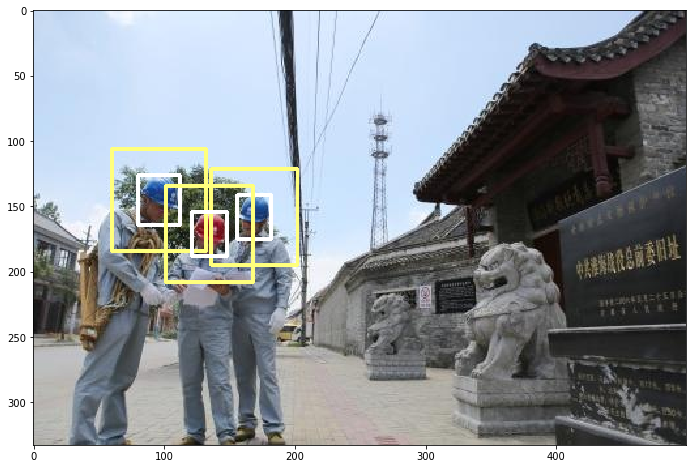

In [13]:
plt.figure(figsize = [13,8])
import random
idx = random.randint(0,100)
TRIAL_IMG_PATH = DATASET_PATH + '/' + labels['ID'][idx]
print(TRIAL_IMG_PATH)
img = cv2.imread(TRIAL_IMG_PATH, cv2.COLOR_BGR2RGB)
imgname = labels['ID'][idx]




for i in range(len(xy_li[imgname])):
    img = cv2.rectangle(img, 
                        tuple(xy_li[imgname][i][0:2]), 
                        tuple(xy_li[imgname][i][2:]), 
                        (255,255,255), 2)
    img = cv2.rectangle(img, 
                        tuple_add_within_image(xy_li[imgname][i][0:2], (-FIXED_WIDTH_PADDING, -FIXED_HEIGHT_PADDING), img), 
                        tuple_add_within_image(xy_li[imgname][i][2:], (FIXED_WIDTH_PADDING, FIXED_HEIGHT_PADDING), img), 
                        (125,255,255), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

image index : 15
	--------------
	with helmet
original image : (500, 600, 3) 	resized : [337, 122]original image : (500, 600, 3) 	resized : [359, 151]	---------------
	without helmet
original image : (500, 600, 3) 	resized : [276, 132]original image : (500, 600, 3) 	resized : [293, 156]original image : (500, 600, 3) 	resized : [200, 121]original image : (500, 600, 3) 	resized : [222, 153]original image : (500, 600, 3) 	resized : [333, 126]original image : (500, 600, 3) 	resized : [344, 148]	iteration end


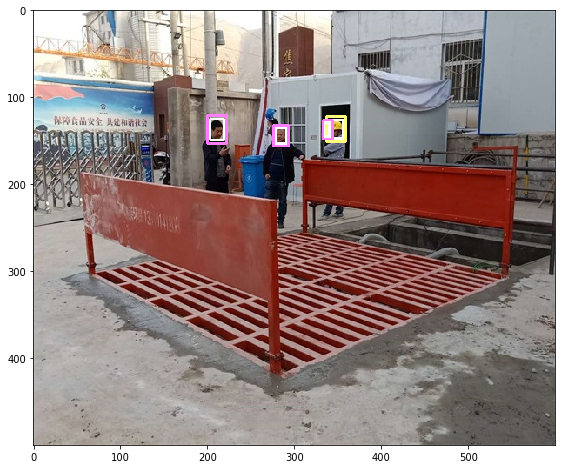

In [15]:
def draw_helmet_for_debug(index):
    image_path = DATASET_PATH + '/' + labels['ID'][index]
    plt.figure(figsize = [13,8])
    img = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    imgname = labels['ID'][index]
    print('image index :', index)
    print('\t--------------')
    print('\twith helmet')
    for i in range(len(xy_li[imgname])):
        img = cv2.rectangle(img, 
                            tuple(xy_li[imgname][i][0:2]), 
                            tuple(xy_li[imgname][i][2:]), 
                            (255,255,255), 2)
        img = cv2.rectangle(img, 
                            tuple_add_within_image(xy_li[imgname][i][0:2], calc_proper_paddingsize(xy_li[imgname][i], 20, sign="-") , img), 
                            tuple_add_within_image(xy_li[imgname][i][2:], calc_proper_paddingsize(xy_li[imgname][i], 20), img), 
                            (125,255,255), 2)
    
    print('\t---------------')
    print('\twithout helmet')
    for i in range(len(xy_li_nonhelmet[imgname])):
        img = cv2.rectangle(img, 
                            tuple(xy_li_nonhelmet[imgname][i][0:2]), 
                            tuple(xy_li_nonhelmet[imgname][i][2:]), 
                            (255,255,255), 2)
        img = cv2.rectangle(img, 
                            tuple_add_within_image(xy_li_nonhelmet[imgname][i][0:2], calc_proper_paddingsize(xy_li_nonhelmet[imgname][i], 20, sign="-"), img), 
                            tuple_add_within_image(xy_li_nonhelmet[imgname][i][2:], calc_proper_paddingsize(xy_li_nonhelmet[imgname][i], 20), img), 
                            (255,125,255), 2)
    print('\titeration end')
        
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
draw_helmet_for_debug(15)

# Run

In [21]:
from PIL import Image
import os

def save_helmetcrop_image(index, logging = True):
    image_path = DATASET_PATH + '/' + labels['ID'][index]
    img = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    
    imgname = labels['ID'][index]
    
    if not imgname in list(xy_li.keys()) :
        if logging :
            print(imgname, ': file does not have any element!')
        return
    
    if logging :
        print('reading', imgname, xy_li[imgname])
    
    if not os.path.isfile(image_path) :
        if logging :
            print(imgname, ': file does not exist!')
        return
    
    for i in range(len(xy_li[imgname])):
    
        minx, miny = tuple_add_within_image(xy_li[imgname][i][0:2], calc_proper_paddingsize(xy_li[imgname][i], 20, sign="-") , img, logging)
        maxx, maxy = tuple_add_within_image(xy_li[imgname][i][2:], calc_proper_paddingsize(xy_li[imgname][i], 20), img, logging)
        
        im = img[miny : maxy, minx : maxx, ::-1]
        if logging : 
            print(img.shape)
        im = Image.fromarray(im)
        if logging :
            print(SAVING_PATH_WITH_HELMET + '/' + str(index) + '_' + str(i) + '.png')
        im.save(SAVING_PATH_WITH_HELMET + '/' + str(index) + '_' + str(i) +'.png')
        if logging :
            print('-----------')

        
def save_non_helmetcrop_image(index, logging = True):
    image_path = DATASET_PATH + '/' + labels['ID'][index]
    img = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    
    imgname = labels['ID'][index]
    
    if not imgname in list(xy_li_nonhelmet.keys()) :
        if logging :
            print(imgname, ': file does not have any element!')
        return
    
    if logging :
        print('reading', imgname, xy_li_nonhelmet[imgname])
    
    if not os.path.isfile(image_path) :
        if logging :
            print(imgname, ': file does not exist!')
        return
    
    for i in range(len(xy_li_nonhelmet[imgname])):
    
        minx, miny = tuple_add_within_image(xy_li_nonhelmet[imgname][i][0:2], calc_proper_paddingsize(xy_li_nonhelmet[imgname][i], 20, sign="-"), img, logging)
        maxx, maxy = tuple_add_within_image(xy_li_nonhelmet[imgname][i][2:], calc_proper_paddingsize(xy_li_nonhelmet[imgname][i], 20), img, logging)
        
        im = img[miny : maxy, minx : maxx, ::-1]
        if logging :
            print(img.shape)
        im = Image.fromarray(im)
        if logging :
            print(SAVING_PATH_WITHOUT_HELMET + '/' + str(index) + '_' + str(i) + '.png')
        im.save(SAVING_PATH_WITHOUT_HELMET + '/' + str(index) + '_' + str(i) +'.png')
        if logging :
            print('-----------')        

# save_helmetcrop_image(17)

In [17]:
for i in range(len(labels)):
    save_helmetcrop_image(i, logging = False)

In [22]:
for i in range(len(labels)):
    save_non_helmetcrop_image(i, logging = False)